In [386]:
!pip install matplotlib-venn

In [387]:
from keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
labels=["T-shirt/top","Trouser","Pullover","Dress","Coat",
        "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Question 1: Download the fashion-MNIST dataset and plot 1 sample image for each class as shown in the grid below. Use "from keras.datasets import fashion_mnist" for getting the fashion mnist dataset.

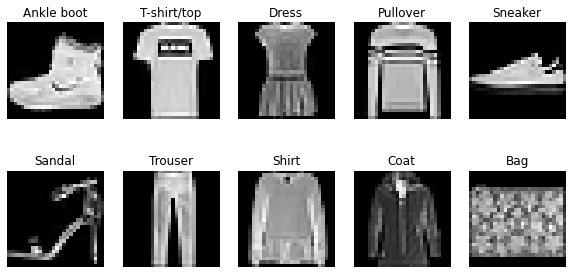

In [388]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) 

plottedClass =  [False for i in range(10)] 
count=0
for i in range(25):
    if  plottedClass[y_train[i]]==False:
      plt.subplot(2,5,count+1).set_title(labels[y_train[i]]) 
      plt.imshow(X_train[i],cmap='gray')
      plt.axis("off")
      plottedClass[y_train[i]]=True
      count=count+1

plt.show()

**Backpropagation code stage1.**

In [389]:
import numpy as np

In [390]:
from sklearn.preprocessing import OneHotEncoder

print("Train data shape {} : Train label shape {}".format(X_train.shape,Y_train.shape))
print("Test data shape {} : Test label shape {}".format(X_test.shape,Y_test.shape))

#flatten the Xtrain and X_test
X_tr=X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_ts=X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

#create one hot encoding of the labels
Y_tr=OneHotEncoder().fit_transform(Y_train.reshape(-1,1)).toarray()
Y_ts=OneHotEncoder().fit_transform(Y_test.reshape(-1,1)).toarray()

print("After reshaping...")

print("Train data shape {} : Train label shape {}".format(X_tr.shape,Y_tr.shape))
print("Test data shape {} : Test label shape {}".format(X_ts.shape,Y_ts.shape))

#normalizing the train data...
X_tr=X_tr/255
X_ts=X_ts/255

Train data shape (60000, 28, 28) : Train label shape (60000,)
Test data shape (10000, 28, 28) : Test label shape (10000,)
After reshaping...
Train data shape (60000, 784) : Train label shape (60000, 10)
Test data shape (10000, 784) : Test label shape (10000, 10)


In [391]:
class Activation:

  def Sigmoid(self,x):
    return 1/(1+np.exp(-x))

  def Softmax(self,x):
    numr=np.exp(x)
    return numr/sum(np.exp(x))

  def Relu(self,x):
    return 1

  def Derivative_Sigmoid(self,x):
    s=1/(1+np.exp(-x))
    return s*(1-s)

  def Derivative_Relu(self,x):
    return 1  
  def Linear(self,x):

    return x


In [392]:
class Loss:

  def CategoricalCrossEntropy(self,ypred,y):
    class_idx=np.argmax(y,axis=0)
    return (-1)*(np.log2(ypred[class_idx]))


  def meansquarederror(self,ypred,y):

    #check for correct squared loss function
    return np.sum((ypred-y)**2)



In [393]:
class HLayer:

  def __init__(self,num_inputs,num_neurons):
    
    np.random.seed(2)
    self.num_inputs=num_inputs
    self.num_neurons=num_neurons
    self.W=np.random.randn(num_neurons,num_inputs)
    self.b=np.random.randn(num_neurons,)

    self.del_h=np.zeros((num_neurons,))
    self.del_a=np.zeros((num_neurons,))
    self.delW=np.zeros((num_neurons,num_inputs))
    self.delb=np.zeros((num_neurons,))

    self.aL=0
    self.hL=0

  def Forward(self,h_L_1):
    
    print("The h(L-1) from previous layer ,",h_L_1.shape)
    self.aL=np.dot(self.W,h_L_1)+self.b
    ac=Activation()
    self.hL=ac.Sigmoid(self.aL)

   
    print("\nThe h(L-1) is ",h_L_1)
    print("\nThe aL shape ,",self.aL.shape)
    print("\nThe aL is ",self.aL)
    print("\nThe hL shape ,",self.hL.shape)
    print("\nThe hL is ",self.hL)



  
  def get_gradients(self,nextW,next_aL,Prev_hL):
      
      self.del_h=np.dot((nextW).T,next_aL)
      self.del_a=(self.del_h)*(Activation().Derivative_Sigmoid(self.aL))
      self.delW=np.dot(self.del_a.reshape(-1,1),Prev_hL.reshape(1,-1))
      self.delb=self.del_a

  def show_gradients(self):
    print("del_h shape ",self.del_h.shape)
    print("del_h \n",self.del_h)

    print("del_a shape ",self.del_a.shape)
    print("del_a \n",self.del_a)

    print("delW shape ",self.delW.shape)
    print("delW \n",self.delW)

    print("delb shape ",self.delb.shape)
    print("delb \n",self.delW)

  def update_gradients(self,eta):

    self.W=self.W-eta*delW
    self.b=self.b-eta*delb
    
  def reset_gradients(self):
    
    self.del_h=np.zeros((num_neurons,))
    self.del_a=np.zeros((num_neurons,))
    self.delW=np.zeros((num_neurons,num_inputs))
    self.delb=np.zeros((num_neurons,))

In [394]:
class OPLayer:

  def __init__(self,num_inputs,num_class):
    
    np.random.seed(2)
    self.num_inputs=num_inputs
    self.num_neurons=num_class
    self.aL=0
    self.hL=0
    self.W=np.random.randn(num_class,num_inputs)
    self.b=np.random.randn(num_class,)

    self.del_h=np.zeros((num_class,))
    self.del_a=np.zeros((num_class,))
    self.delW=np.zeros((num_class,num_inputs))
    self.delb=np.zeros((num_class,))


  def Forward(self,h_L_1):
    print("The h(L-1) from previous layer ,",h_L_1.shape)
    self.aL=np.dot(self.W,h_L_1)+self.b
    ac=Activation()
    self.hL=ac.Softmax(self.aL)

    #cooment this line later..
    print("\nThe h(L-1) is ",h_L_1)
    print("\nThe aL shape ,",self.aL.shape)
    print("\nThe aL is ",self.aL)
    print("\nThe hL shape ,",self.hL.shape)
    print("\nThe hL is ",self.hL)


  
  #Y_hat is (nx10) same as Y_true
  def get_gradients(self,Y_hat,Y,prev_hL):
      
      for i in range(len(Y_hat)):
        self.del_h+=(-1/Y_hat[i][np.argmax(Y[i])]*Y[i])

      for i in range(len(Y_hat)):  
        self.del_a+=(Y_hat[i]-Y[i])

      self.delW=np.dot(self.del_a.reshape(-1,1),prev_hL.reshape(1,-1))
      self.delb=self.del_a

  def show_gradients(self):
    print("dely_hat shape ",self.del_h.shape)
    print("dely_hat \n",self.del_h)

    print("del_a shape ",self.del_a.shape)
    print("del_a \n",self.del_a)

    print("delW shape ",self.delW.shape)
    print("delW \n",self.delW)

    print("delb shape ",self.delb.shape)
    print("delb \n",self.delW)



  def update_gradients(self):

    self.W=self.W-eta*delW
    self.b=self.b-eta*delb

  def reset_gradients(self):
    self.del_h=np.zeros((num_class,))
    self.del_a=np.zeros((num_class,))
    self.delW=np.zeros((num_class,num_inputs))
    self.delb=np.zeros((num_class,))



In [395]:
class IpLayer:

  def __init__(self,num_neurons):
    self.num_neurons=num_neurons
    self.hL=0


  def Forward(self,x):
    self.hL=x
    print("for input layer the hL shape ",self.hL.shape)



In [404]:
class NN:

  def __init__(self,input_shape,num_hlayers,neurons,activation_hl,activation_op,output_shape):

    self.input_shape=input_shape
    self.output_shape=output_shape
    self.num_hlayers=num_hlayers
    self.neurons=neurons
    self.activation_hl=activation_hl
    self.activation_op=activation_op
    self.Layers=[]
    self.eta=1e-4
    self.loss=0.0

    #used to store the predicted probabilities of passed data
    self.Y_hat=[]

  
  def create_architecture(self):

    #create input layer
    self.Layers.append(IpLayer(self.input_shape))

    #hidden layers..
    for layer in range(1,self.num_hlayers+1):
      
      ip_shape=self.Layers[layer-1].num_neurons
      self.Layers.append(HLayer(ip_shape,self.neurons[layer-1]))

    #output layer..

    self.Layers.append(OPLayer(self.Layers[self.num_hlayers].num_neurons,self.output_shape))  
     

  def Feed_Forward(self,X_train,Y_train):


    #pass whole data to the NN to get the loss:
    print("Feeding the data one by one to the NN...")
    self.loss=0
    for i in range(X_train.shape[0]):

      print("\n passing  datapoint..{}".format(i))
      #get the data in input layer
      self.Layers[0].Forward(X_train[i])

      #pass the data to the hl+ol

      for j in range(1,self.num_hlayers+2):

        print("For Layer :\n",j)
        h_L_1=self.Layers[j-1].hL

        self.Layers[j].Forward(h_L_1)

        print("**"*50)
      
      #calculate the loss for this datapoint:
      ypred=self.Layers[self.num_hlayers+1].hL
      self.Y_hat.append(ypred)
      self.loss+=Loss().CategoricalCrossEntropy(ypred,Y_train[0])


      print("\nloss upto datapoint {} is {}".format(i,self.loss))
    
    print("Loss is : ",self.loss)

  def Back_Propogation(self,Y):

    #get gradients for output layer first..
    prev_hL=self.Layers[self.num_hlayers].hL
    self.Layers[self.num_hlayers+1].get_gradients(self.Y_hat,Y,prev_hL)

    #getting gradients for hidden layers..
    for i in range(self.num_hlayers,0,-1):

      prev_hL=self.Layers[i-1].hL
      next_W=self.Layers[i+1].W
      next_aL=self.Layers[i+1].aL
      self.Layers[i].get_gradients(next_W,next_aL,prev_hL)

      
  #update gradients for each layer...
  def update_gradients(self):
    
    for i in range(1,self.num_hlayers+2):
      self.Layers[i].update_gradients(self.eta)

  #reset gradients for each layer...
  def reset_gradients(self):

    for i in range(1,self.num_hlayers+2):
      self.Layers[i].reset_gradients()
    
    self.loss=0

In [401]:
X_sample=X_tr[:5]
Y_sample=Y_tr[:5]

In [405]:
#### DEBUGGING CELL ####
arch1=NN(784,2,[20,15],'sigmoid','softmax',10)
arch1.create_architecture()
LTest=arch1.Layers
for l in range(len(LTest)):

  print("LAYER NUMBER: ",l)
  print("num_neurons :",LTest[l].num_neurons)

  if l!=0:
    print("number of inputs :",LTest[l].num_inputs)
    print("shape of weights :",LTest[l].W.shape)
    print("shape of biases :",LTest[l].b.shape)
    print("shape of delW :",LTest[l].delW.shape)
    print("shape of delb :",LTest[l].delb.shape)
    print("shape of delh :",LTest[l].del_h.shape)
    print("shape of dela :",LTest[l].del_a.shape)
  
  print("--"*50)


LAYER NUMBER:  0
num_neurons : 784
----------------------------------------------------------------------------------------------------
LAYER NUMBER:  1
num_neurons : 20
number of inputs : 784
shape of weights : (20, 784)
shape of biases : (20,)
shape of delW : (20, 784)
shape of delb : (20,)
shape of delh : (20,)
shape of dela : (20,)
----------------------------------------------------------------------------------------------------
LAYER NUMBER:  2
num_neurons : 15
number of inputs : 20
shape of weights : (15, 20)
shape of biases : (15,)
shape of delW : (15, 20)
shape of delb : (15,)
shape of delh : (15,)
shape of dela : (15,)
----------------------------------------------------------------------------------------------------
LAYER NUMBER:  3
num_neurons : 10
number of inputs : 15
shape of weights : (10, 15)
shape of biases : (10,)
shape of delW : (10, 15)
shape of delb : (10,)
shape of delh : (10,)
shape of dela : (10,)
--------------------------------------------------------------

In [406]:
arch1.Feed_Forward(X_sample,Y_sample)

Feeding the data one by one to the NN...

 passing  datapoint..0
for input layer the hL shape  (784,)
For Layer :
 1
The h(L-1) from previous layer , (784,)

The h(L-1) is  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 

In [408]:
print("cumulative Loss is :",arch1.loss)

cumulative Loss is : 18.128194318788395


In [409]:
arch1.Back_Propogation(Y_sample)


print("Gradients For various layers:\n")
for i in range(1,arch1.num_hlayers+2):
  print("Layer_number : ",i)
  arch1.Layers[i].show_gradients()
  print("**"*50)

Gradients For various layers:

Layer_number :  1
del_h shape  (20,)
del_h 
 [ -1.33828523  -4.10233671  15.5746545    5.87373503   3.57934998
  -3.1600109   -7.5708088   11.17794677  -4.68170729   1.34580625
  12.27579626  11.24025536  -3.25558826  14.74063175  12.58190731
   4.73977805  27.89521423 -10.79278353  -2.27306188   5.74156541]
del_a shape  (20,)
del_a 
 [-1.82204884e-11 -2.08585322e-02  4.18117345e-07  3.86114783e-03
  1.80166982e-13 -6.09135261e-01 -1.89258355e+00  2.60721905e-07
 -3.03071741e-09  2.52552130e-02  6.28894750e-01  2.58881293e-04
 -8.11424841e-01  2.67399590e-04  2.44044755e-01  1.26066604e-06
  6.18412242e-07 -5.73867656e-09 -1.51416338e-15  6.24134639e-02]
delW shape  (20, 784)
delW 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
delb shape  (20,)
delb 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0